In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv('synthetic_flu_vaccine_data.csv')

In [5]:
# Inspect structure of dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                1000 non-null   int64 
 1   h1n1_concern                 1000 non-null   int64 
 2   h1n1_knowledge               1000 non-null   int64 
 3   behavioral_antiviral_meds    1000 non-null   int64 
 4   behavioral_avoidance         1000 non-null   int64 
 5   behavioral_face_mask         1000 non-null   int64 
 6   behavioral_wash_hands        1000 non-null   int64 
 7   behavioral_large_gatherings  1000 non-null   int64 
 8   behavioral_outside_home      1000 non-null   int64 
 9   behavioral_touch_face        1000 non-null   int64 
 10  doctor_recc_h1n1             1000 non-null   int64 
 11  doctor_recc_seasonal         1000 non-null   int64 
 12  chronic_med_condition        1000 non-null   int64 
 13  child_under_6_months         1000 

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1,2,1,1,1,1,0,0,1,0,...,Own,Unemployed,Region 8,Non-MSA,3,2,Industry A,Occupation A,0,0
1,2,3,2,0,0,1,0,1,1,0,...,Own,Unemployed,Region 6,Non-MSA,1,3,Industry A,Occupation C,0,0
2,3,0,0,0,0,1,0,1,1,1,...,Rent,Unemployed,Region 5,MSA,2,0,Industry A,Occupation C,0,1
3,4,2,0,0,1,1,0,0,1,1,...,Own,Not in Labor Force,Region 3,Non-MSA,2,3,Industry C,Occupation A,1,1
4,5,2,0,1,0,1,1,0,0,1,...,Rent,Unemployed,Region 1,Non-MSA,3,3,Industry C,Occupation C,1,0


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status         

In [7]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count    1000.000000   1000.000000      1000.00000                1000.000000   
mean      500.500000      1.534000         0.98700                   0.513000   
std       288.819436      1.151595         0.81823                   0.500081   
min         1.000000      0.000000         0.00000                   0.000000   
25%       250.750000      0.000000         0.00000                   0.000000   
50%       500.500000      2.000000         1.00000                   1.000000   
75%       750.250000      3.000000         2.00000                   1.000000   
max      1000.000000      3.000000         2.00000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count           1000.000000           1000.000000            1000.000000   
mean               0.526000              0.476000               0.489000   
std                0.

C:\Users\yuvra\AppData\Local\Temp\ipykernel_23588\1198786727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="h1n1_vaccine", data=df, ax=axes[0], palette="viridis")
C:\Users\yuvra\AppData\Local\Temp\ipykernel_23588\1198786727.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="seasonal_vaccine", data=df, ax=axes[1], palette="magma")


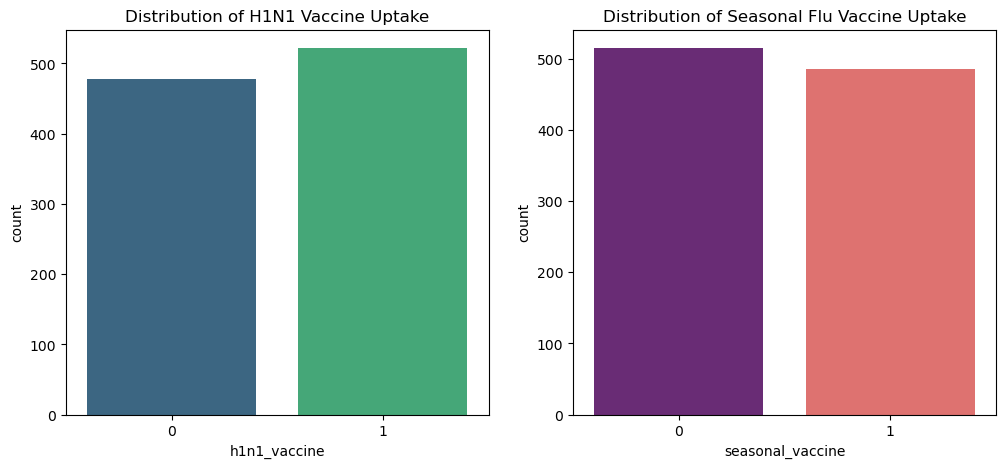

In [8]:
# Data Visualization
# Distribution of target variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x="h1n1_vaccine", data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Distribution of H1N1 Vaccine Uptake")
sns.countplot(x="seasonal_vaccine", data=df, ax=axes[1], palette="magma")
axes[1].set_title("Distribution of Seasonal Flu Vaccine Uptake")
plt.show()

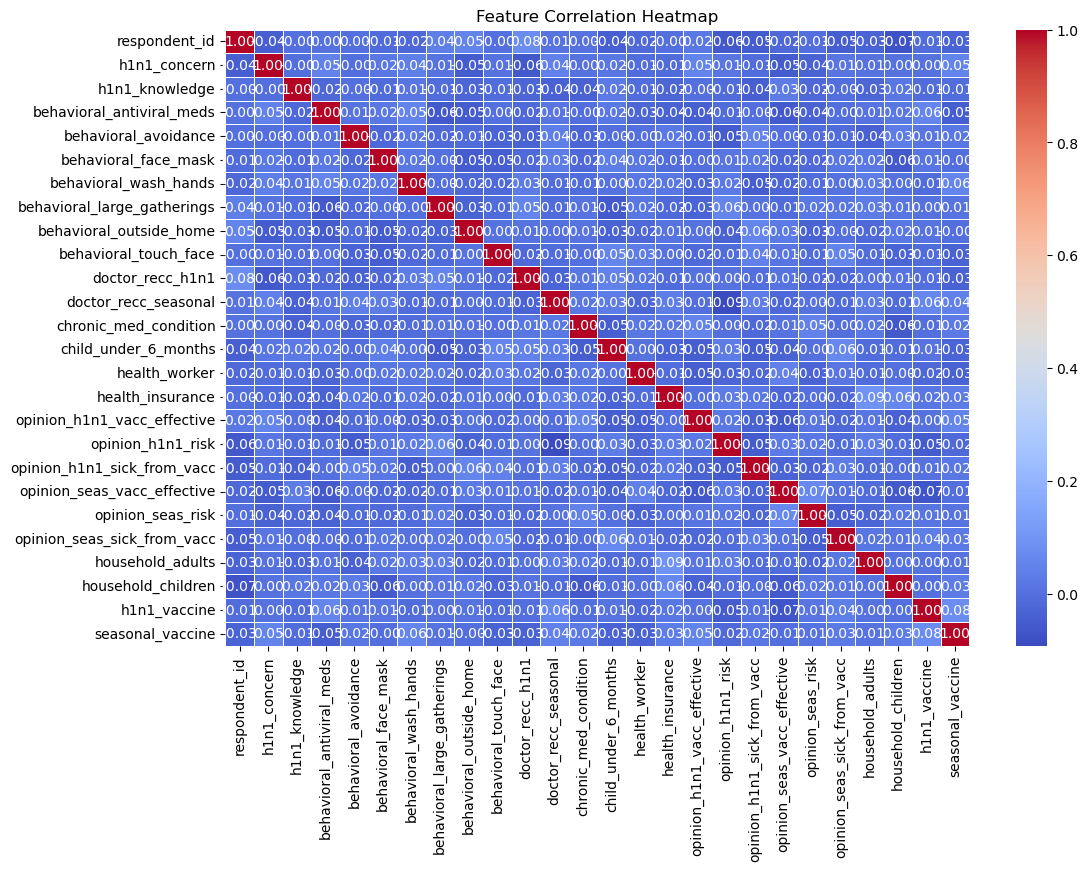

In [9]:
# Correlation Heatmap of numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Data Analysis
# Identify top correlations with vaccine uptake
vaccine_correlation = corr_matrix["h1n1_vaccine"].sort_values(ascending=False)
print("Top Correlations with H1N1 Vaccine:\n", vaccine_correlation.head(10))

Top Correlations with H1N1 Vaccine:
 h1n1_vaccine                   1.000000
seasonal_vaccine               0.075427
doctor_recc_seasonal           0.060412
behavioral_antiviral_meds      0.056930
opinion_seas_sick_from_vacc    0.039067
health_insurance               0.018511
opinion_seas_risk              0.014278
behavioral_face_mask           0.014142
behavioral_avoidance           0.013744
child_under_6_months           0.007480
Name: h1n1_vaccine, dtype: float64


In [17]:
# Reporting Results
# Summarize findings and save processed data
df.to_csv("processed_h1n1_vaccine_data.csv", index=False)
print("Processed dataset saved.")

Processed dataset saved.
